# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

pd.DataFrame(cities).to_csv(output_data_file,header=False,index=False)
        
# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
cities = pd.read_csv(output_data_file, header=None)[0].tolist()

In [3]:
units= "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1
set_count = 1
process_log = []
weather = []
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_speed = []

for city in cities:
    if count == 51:
        time.sleep(1)
        count = 1
        set_count += 1

    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url)
    response_data = response.json()
    try:
        city_list.append(response_data["name"])
        cloudiness.append(response_data["clouds"]["all"])
        country.append(response_data["sys"]["country"])
        date.append(response_data["dt"])
        humidity.append(response_data["main"]["humidity"])
        lats.append(response_data["coord"]["lat"])
        lngs.append(response_data["coord"]["lon"])
        max_temp.append(response_data["main"]["temp_max"])
        wind_speed.append(response_data["wind"]["speed"])
        process_log.append(f"Processing Record {count} of Set {set_count} | {city}")
        print(process_log[-1])
        count += 1
    except:
        process_log.append(f"City not found. Skipping...")
        print(process_log[-1])
        
pd.DataFrame(process_log).to_csv("output_data/WeatherPy_process_log.txt",header=False, index=False)

Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | hobart
City not found. Skipping...
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | xunchang
Processing Record 6 of Set 1 | ola
Processing Record 7 of Set 1 | monrovia
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | rubik
Processing Record 10 of Set 1 | atuona
City not found. Skipping...
Processing Record 11 of Set 1 | tallinn
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | seoul
Processing Record 14 of Set 1 | peniche
Processing Record 15 of Set 1 | sterling
Processing Record 16 of Set 1 | grand gaube
City not found. Skipping...
City not found. Skipping...
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 

Processing Record 29 of Set 4 | la rioja
Processing Record 30 of Set 4 | hithadhoo
Processing Record 31 of Set 4 | mariental
Processing Record 32 of Set 4 | arraial do cabo
Processing Record 33 of Set 4 | chokurdakh
Processing Record 34 of Set 4 | kavieng
Processing Record 35 of Set 4 | neiafu
Processing Record 36 of Set 4 | los llanos de aridane
Processing Record 37 of Set 4 | komsomolskiy
Processing Record 38 of Set 4 | samarai
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | susanville
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | rock springs
Processing Record 47 of Set 4 | emporia
Processing Record 48 of Set 4 | palmer
City not found. Skipping...
Processing Record 49 of Set 4 | tangwani
City not found. Skipping...
Processing Record 50 of Set 4 | kysyl-syr
Processing

Processing Record 20 of Set 8 | seryshevo
Processing Record 21 of Set 8 | gawler
City not found. Skipping...
Processing Record 22 of Set 8 | pangnirtung
Processing Record 23 of Set 8 | boa vista
Processing Record 24 of Set 8 | saldanha
Processing Record 25 of Set 8 | kieta
Processing Record 26 of Set 8 | bridlington
Processing Record 27 of Set 8 | gondanglegi
Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | berezovka
Processing Record 31 of Set 8 | deder
Processing Record 32 of Set 8 | hirara
Processing Record 33 of Set 8 | tongren
City not found. Skipping...
Processing Record 34 of Set 8 | bom jesus da lapa
City not found. Skipping...
Processing Record 35 of Set 8 | klamath falls
Processing Record 36 of Set 8 | clemson
Processing Record 37 of Set 8 | palmas de monte alto
Processing Record 38 of Set 8 | villa sandino
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | galesong
Processing Record 41

Processing Record 3 of Set 12 | newcastle
Processing Record 4 of Set 12 | avera
City not found. Skipping...
Processing Record 5 of Set 12 | griffith
Processing Record 6 of Set 12 | buala
Processing Record 7 of Set 12 | bilma
Processing Record 8 of Set 12 | axim
Processing Record 9 of Set 12 | matagami
Processing Record 10 of Set 12 | harnosand
Processing Record 11 of Set 12 | maningrida
Processing Record 12 of Set 12 | yeppoon


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})

df.to_csv("output_data/Weather_Data.csv", header=True, index=False)
df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
# datetime.utcfromtimestamp(df['Date'][0]).strftime('%m/%d/%Y')
df["Date"] = df.Date.apply(lambda d: datetime.strftime(datetime.utcfromtimestamp(d), "%m/%d/%Y"))
df["Date"].unique()
date = df["Date"].unique()[0]

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,75,CA,10/10/2019,79,69.44,-133.03,37.40,11.41
1,Hobart,40,AU,10/09/2019,66,-42.88,147.33,55.99,10.29
2,East London,100,ZA,10/09/2019,71,-33.02,27.91,59.13,16.38
3,Carnarvon,0,ZA,10/09/2019,73,-30.97,22.13,40.12,21.66
4,Xunchang,99,CN,10/10/2019,78,28.45,104.71,64.99,1.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

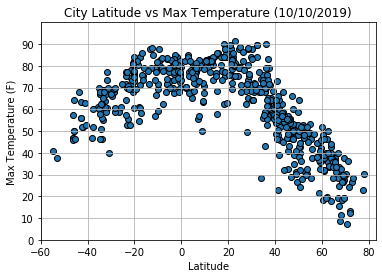

In [6]:
plt.scatter(df["Lat"],df["Max Temp"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(min(0,round(min(df["Max Temp"])-5,0)),max(100,round(max(df["Max Temp"])+5,0)),10))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(min(0,round(min(df["Max Temp"])-5,0)),max(100,round(max(df["Max Temp"])+5,0)))
plt.savefig("output_data/max_temp.png")

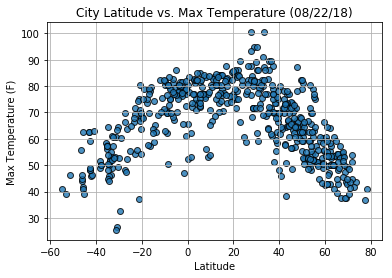

#### Latitude vs. Humidity Plot

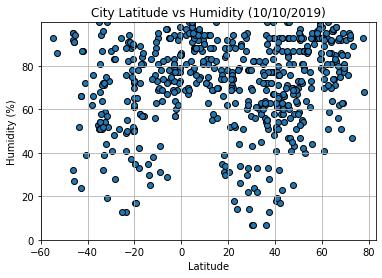

In [7]:
plt.scatter(df["Lat"],df["Humidity"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,100,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(0,100)
plt.savefig("output_data/huminity.png")

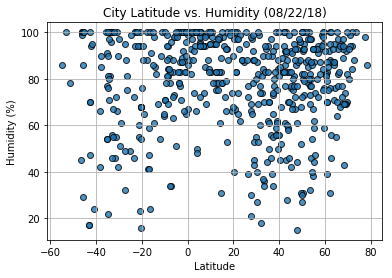

#### Latitude vs. Cloudiness Plot

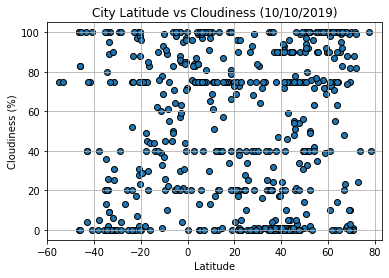

In [8]:
plt.scatter(df["Lat"],df["Cloudiness"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,110,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(-5,105)
plt.savefig("output_data/cloudiness.png")

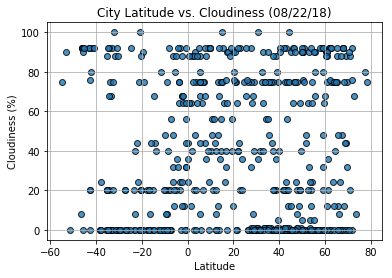

#### Latitude vs. Wind Speed Plot

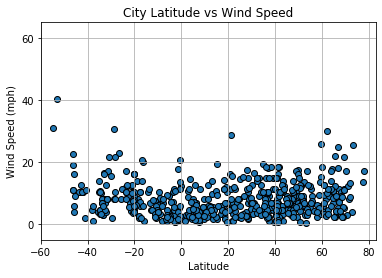

In [9]:
plt.scatter(df["Lat"],df["Wind Speed"], facecolor="tab:blue", edgecolor="k")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.xticks(np.arange(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0),20))
plt.yticks(np.arange(0,70,20))
plt.xlim(round(min(df["Lat"])-5,0),round(max(df["Lat"])+5,0))
plt.ylim(-5,65)
plt.savefig("output_data/wind_speed.png")

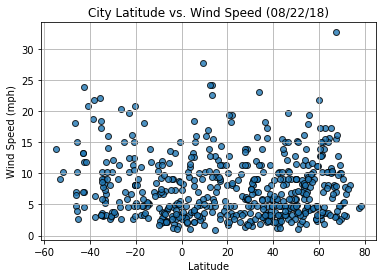